In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 16})

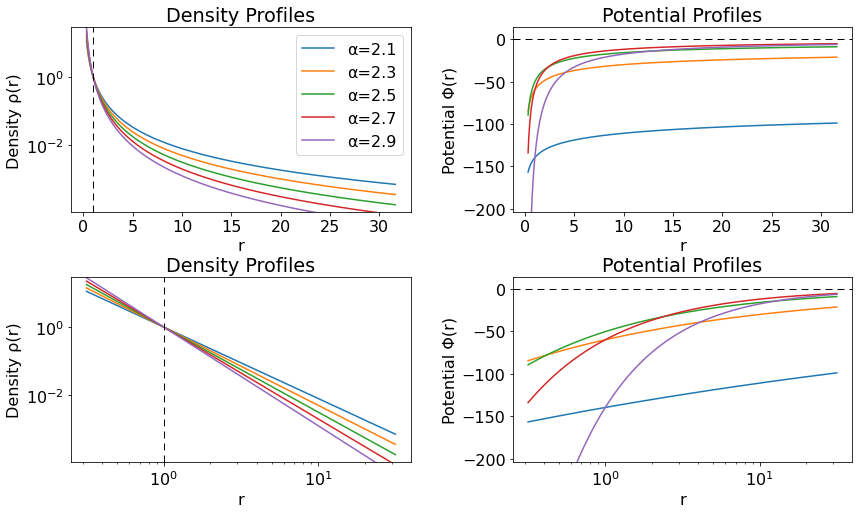

In [88]:
# Constants
rho_0 = 1.0  # Arbitrary density normalization
a = 1.0      # Scale parameter
G = 1.0      # Gravitational constant (set to 1 for simplicity)

# Range of r values
r = np.logspace(-0.5, 1.5, 1000)

# Values of alpha
alpha_values = np.linspace(2.1, 2.9, 5).tolist()

# Create the plots
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8))

plt.subplots_adjust(hspace=0.35, wspace=0.3)  # Adjust hspace here, and avoid calling tight_layout()

# Accessing individual axes
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]

# Collect density values at the lowest r for percentile calculation
density_values_at_highest_r = []

# Plot density profiles
for alpha in alpha_values:
    rho = rho_0 * (a / r)**alpha
    ax1.plot(r, rho, label=f'α={alpha:.1f}')
    ax3.plot(r, rho, label=f'α={alpha:.1f}')
    # Collect density values at the highest r
    density_values_at_highest_r.append(rho[-1])

# Compute the Nth percentile of the collected density values
Nth = 30
percentile_den_Nth = np.percentile(density_values_at_highest_r, Nth)

# Set the minimum limit of the Y-axis to the 5th percentile
ax1.set_ylim(bottom=percentile_den_Nth)

ax1.set_xlabel('r')
ax1.set_ylabel('Density ρ(r)')
ax1.set_title('Density Profiles')
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.legend()

# Scale radius
ax1.axvline(x=a, color='k', linestyle=(0, (7, 5)), linewidth=1)

# ---------------------------------------

# Collect potential values at the lowest r for percentile calculation
potential_values_at_lowest_r = []

# Plot potential profiles
for alpha in alpha_values:
    if alpha != 2 and alpha != 3:  # Avoid singularities
        phi = -4 * np.pi * G * rho_0 * a**alpha * r**(2 - alpha) / ((3 - alpha) * (alpha - 2))
        ax2.plot(r, phi, label=f'α={alpha:.1f}')
        ax4.plot(r, phi, label=f'α={alpha:.1f}')
        # Collect potential values at the lowest r
        potential_values_at_lowest_r.append(phi[0])

# Compute the Nth percentile of the collected potential values
Nth = 20
percentile_pot_Nth = np.percentile(potential_values_at_lowest_r, Nth)

# Set the minimum limit of the Y-axis to the 5th percentile
ax2.set_ylim(bottom=percentile_pot_Nth)

# Each dash is 7 points long and there are 5 points between dashes
ax2.axhline(y=0, color='k', linestyle=(0, (7, 5)), linewidth=1)

ax2.set_xlabel('r')
ax2.set_ylabel('Potential Φ(r)')
ax2.set_title('Potential Profiles')
#ax2.set_xscale('log')

# ---------------------------------------

# Set the minimum limit of the Y-axis to the 5th percentile
ax3.set_ylim(bottom=percentile_den_Nth)

ax3.set_xlabel('r')
ax3.set_ylabel('Density ρ(r)')
ax3.set_title('Density Profiles')
ax3.set_yscale('log')
ax3.set_xscale('log')

# Scale radius
ax3.axvline(x=a, color='k', linestyle=(0, (7, 5)), linewidth=1)

# ---------------------------------------


# Set the minimum limit of the Y-axis to the 5th percentile
ax4.set_ylim(bottom=percentile_Nth)

# Each dash is 7 points long and there are 5 points between dashes
ax4.axhline(y=0, color='k', linestyle=(0, (7, 5)), linewidth=1)

ax4.set_xlabel('r')
ax4.set_ylabel('Potential Φ(r)')
ax4.set_title('Potential Profiles')
ax4.set_xscale('log')

# Adjust layout and show plot
#plt.tight_layout()

# Save the figure
plt.savefig("../Figures/power_law_density_potential.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()